In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y evalue $f''(\pi/8)$ con $h = 0.05$.
* Encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



-0.3826833526630986
-0.3826834323650898
El es error -7.970199117357524e-08


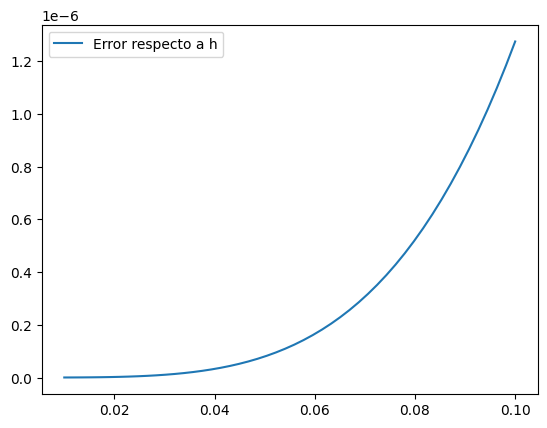

In [ ]:
x = np.linspace(0,2*np.pi,10)
f = lambda x: np.cos(x)
df = lambda x: -np.sin(x)
error_l = []

aprox = dx_5p_central(f,np.pi/8,0.05)
print(dx_5p_central(f,np.pi/8,0.05))
print(df(np.pi/8))
print('El es error', df(np.pi/8) - aprox)
for i in np.linspace(0.01,0.1,50):
  error_l.append(abs(df(np.pi/8) - dx_5p_central(f,np.pi/8,i)))
plt.plot(np.linspace(0.01,0.1,50), error_l, label = 'Error respecto a h')
plt.legend()
plt.show()



#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`
*   ¿Cuál será el valor óptimo de $h$?

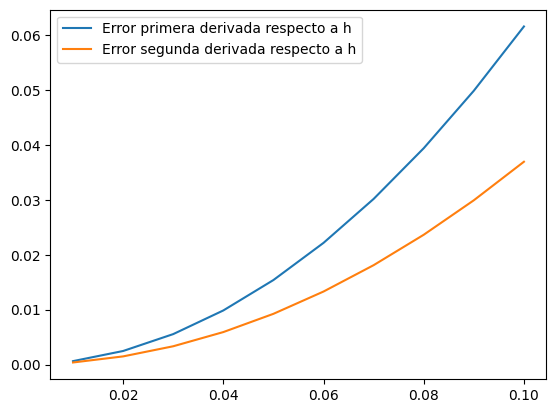

In [ ]:
f = lambda x: x*np.exp(x)
df = lambda x: np.exp(x) + x*np.exp(x)
ddf = lambda x: 2*np.exp(x) + x*np.exp(x)
error_l = []
error_l2 = []
x = np.linspace(0.01,0.1,10)
dx_aprox = dx_finite_central(f,2,0.01)
ddx_aprox = ddx_finite_central(f,2,0.01)
for i in x:
  dx_error = abs(df(2) - dx_finite_central(f,2,i))
  ddx_error = abs(ddf(2) - ddx_finite_central(f,2,i))
  error_l.append(dx_error)
  error_l2.append(ddx_error)
plt.plot(x, error_l, label = 'Error primera derivada respecto a h')
plt.plot(x, error_l2, label = 'Error segunda derivada respecto a h')
plt.legend()
plt.show()





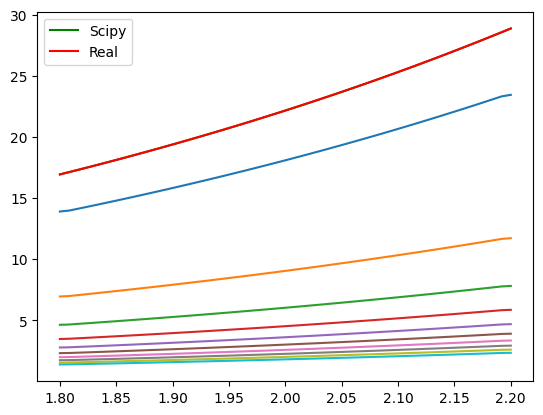

In [ ]:
x = sp.Symbol('x')
df_analitica = sp.diff(x*sp.exp(x))
df = sp.lambdify(x,df_analitica)
df_lambda = lambda n: np.exp(n) + n*np.exp(n)
f = lambda n: n*np.exp(n)
X = np.linspace(1.8,2.2)
y = f(X)
h = np.linspace(0.01,0.1,10)
for i in h:
  df_aprox = np.gradient(y,i)
  plt.plot(X,df_aprox)
plt.plot(X,df(X), label = 'Scipy', color = 'green')
plt.plot(X,df_lambda(X), label = 'Real', color = 'red') #Son la misma
plt.legend() #El más optimo es 0.01
plt.show()


#3.
Compare la primera derivada del punto 2 usando los métodos de diferencias finitas, derivada de tres y cinco puntos para el $h$ con el menor error encontrado en el punto anterior. Compare de nuevo para $f'(2)$ y encuentre los errores.

In [ ]:
f = lambda x: x*np.exp(x)
df = lambda x: np.exp(x) + x*np.exp(x)
x = np.linspace(1.8,2.2,6)
h = 0.01
y = f(x)
dx_aprox_5p = dx_5p_central(f,2,h)
dx_aprox_3p = dx_3p_central(f,2,h)
dx_aprox_finite = dx_finite_central(f,2,h)
dx_error_5p = abs(df(2) - dx_aprox_5p)
dx_error_3p = abs(df(2) - dx_aprox_3p)
dx_error_finite = abs(df(2) - dx_aprox_finite)
print('Error 5 puntos ', dx_error_5p) #La más eficiente
print('Error 3 puntos ', dx_error_3p)
print('Error Partes finitas ', dx_error_finite)

Error 5 puntos  1.7241784888710754e-08
Error 3 puntos  0.0006157589849351552
Error Partes finitas  0.0006157589849351552


In [ ]:
def dx_5p_central(f,x, h):
  return (f(x - 2*h) - 8*f(x - h) +  8*f(x + h) - f(x + 2*h))/(12*h) #f(xi−2)−8f(xi−1)+8f(xi+1)−f(xi+2)
def dx_5p_forward(f,x, h):
  return (-25*f(x)+ 48*f(x+ h) - 36*f(x+ 2*h)+16*f(x+ 3*h)-3*f(x + 4*h))/(12*h)
def dx_5p_backward(f,x, h):
  return 25*f(x)- 48*f(x - h)+ 36*f(x - 2*h)-16*f(x - 3*h)+3*f(x - 4*h)/(12*h)

In [ ]:


def dx_finite_central(f, x, h):
  return (f(x + h) - f(x - h))/(2*h)
def dx_finite_forward(f, x, h):
  return (f(x + h) - f(x))/(h)
def dx_finite_backward(f, x, h):
  return (f(x) - f(x - h))/(h)
def ddx_finite_central(f, x, h):
  return (f(x + h) - 2*f(x) + f(x - h))/(h**2)


In [ ]:
def dx_3p_central(f, x, h):
  return (f(x + h) - f(x - h))/(2*h)
def dx_3p_foward(f, x, h):
  return (-f(x + 2*h) + 4*f(x + h) - 3*f(x))/(2*h)
def dx_3p_backward(f, x, h):
  return (3*f(x) - 4*f(x - h) + f(x - 2*h))/(2*h)